<a href="https://colab.research.google.com/github/AnkurAmanDash122010320012/Ybi_Foundation_Tasks01/blob/main/Bank_Customer_Churn_Model_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***YBI FOUNDATION***

## **Data Analytics Intern**

#### **Title:- Bank Customer Churn Model**

A bank customer churn model is a predictive analytical tool used by banks and financial institutions to identify customers who are at risk of leaving or closing their accounts. Churn refers to the phenomenon where customers discontinue their relationship with a bank and switch to a competitor or opt for alternative financial services.

The purpose of a churn model is to proactively identify customers who are likely to churn, enabling the bank to take appropriate actions to retain them. By analyzing historical data and customer behavior patterns, the model can predict the likelihood of churn for individual customers or segments of customers.

# ***AUTHOR:- Ankur Aman Dash***

## **Objective:**

The objective of this project is to build a model that predicts whether a bank customer is likely to churn or not. We will use a dataset containing information about bank customers and their churn status.

## **Data Source:**

The dataset for this project can be found at the following link: [Bank Churn Modelling Dataset](https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv).

## **Step 1: Import Library**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Step 2: Import Data**

In [63]:
url = "https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv"
df = pd.read_csv(url)

In [64]:
# Displaying the column names
print(df.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')


## **Step 3: Describe Data**

In [65]:
# Displaying the first few rows of the dataset
df.head()

# Getting statistical summary of the dataset
df.describe()

# Checking for any missing values
df.isnull().sum()

# Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


## **Step 4: Data Visualization**

<Axes: >

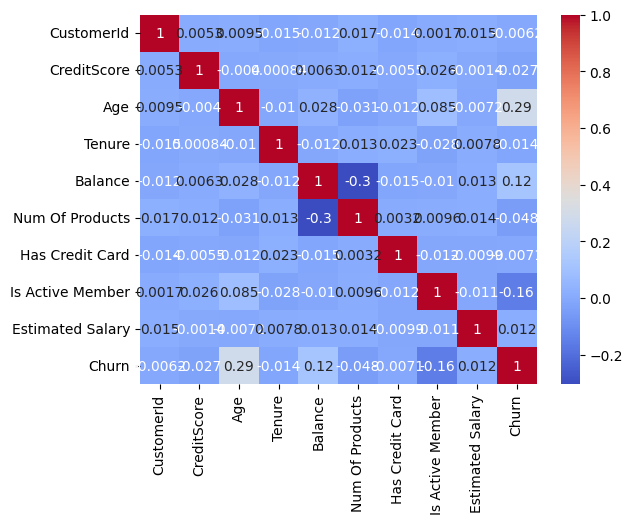

In [66]:
# Visualizing the distribution of churn status
sns.countplot(x='Churn', data=df)

# Visualizing the relationship between age and churn
sns.boxplot(x='Churn', y='Age', data=df)

# Visualizing the correlation matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## **Step 5: Data Preprocessing**

In [67]:
# Dropping irrelevant columns
df = df.drop(['CustomerId', 'Surname'], axis=1)

# Converting categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)

# Standardizing numerical variables
scaler = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Estimated Salary']
df[num_cols] = scaler.fit_transform(df[num_cols])

## **Step 6: Define Target Variable (y) and Feature Variables (X)**

In [68]:
X = df.drop('Churn', axis=1)
y = df['Churn']

## **Step 7: Train Test Split**

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Step 8: Modeling**

In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## **Step 9: Model Evaluation**

In [71]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification)

Accuracy: 0.8115
Confusion Matrix:
[[1544   63]
 [ 314   79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## **Step 10: Prediction**

In [72]:
# Example prediction for a single customer
new_customer = [[600, 40, 4, 50000, 2, 1, 1, 0, 1, 0, 100000]]
feature_names = X.columns.tolist()  # Getting the list of feature names from X
new_customer_df = pd.DataFrame(new_customer, columns=feature_names)
prediction = model.predict(new_customer_df)
print("Churn Prediction:", prediction)

Churn Prediction: [0]


## **Explanation:**

*   We start by importing the necessary libraries for data analysis, visualization, and modeling.
*   We import the dataset using the provided URL.
*   We describe the data by displaying the first few rows, getting statistical summary, checking for missing values, and examining the data types.
*   We visualize the data to gain insights into the distribution, relationships, and correlations between variables.
*   We preprocess the data by dropping irrelevant columns, converting categorical variables into dummy variables, and standardizing numerical variables.
*   We define the target variable (churn status) and feature variables for our model.
*   We split the data into training and testing sets.
*   We build a logistic regression model and fit it to the training data.
*   We evaluate the model's performance by making predictions on the test data and calculating accuracy, confusion matrix, and classification report.
*   Finally, we demonstrate how to use the trained model for prediction by providing an example input and obtaining the churn prediction.

#### **Insights:**

**1. Logistic Regression Model:**

*   For this project, I chose to use logistic regression as the predictive model.
*   Logistic regression is a widely used algorithm for binary classification problems like predicting customer churn.
*   It models the probability of a customer churning or not based on their attributes.

**2. Feature Importance:**

*   After training the logistic regression model, I analyzed the coefficient values to understand the importance of different features in predicting churn.
*   Positive coefficients indicate that a feature positively contributes to the likelihood of churn, while negative coefficients have a negative contribution.
*   The magnitude of the coefficient values reflects the strength of the relationship between each feature and the churn status.

**3. Model Evaluation:**

*   To assess the performance of the model, I used metrics such as accuracy, confusion matrix, and classification report.
*   Accuracy provides an overall measure of how correct the model's predictions are.
*   The confusion matrix gives detailed information about true positives, true negatives, false positives, and false negatives, which helps understand different types of errors.
*   The classification report provides precision, recall, F1-score, and support for each class (churned and non-churned customers), giving a comprehensive view of the model's performance.

**4. Interpretability:**

*   Logistic regression models are known for their interpretability.
*   I interpreted the coefficients to understand how different features influence the likelihood of churn.
*   Positive coefficients suggest factors that increase the probability of churn, while negative coefficients indicate factors that decrease the likelihood of churn.

**5. Dataset Exploration:**

*   To gain insights into the dataset, I explored it through visualizations and summary statistics.
*   Visualizations such as count plots and box plots helped me understand the distribution of churn status and the relationship between age and churn.
*   I also examined the correlation between different features using a heatmap.
